## 시계열 분석

In [1]:
import pandas as pd

# 주어진 파일 경로
file_path = 'C:/Users/Administrator/Desktop/dayeong/불법주정차_신고현황_동대문구_filtered.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

df.head()

,민원접수일,민원접수시간,주소,경도,위도,도로명주소
0,20240208,07:55:00,서울특별시 동대문구 외대역동로 90,127.065608,37.596081,이문동 이문2동 동대문구 서울특별시
1,20240223,19:23:00,서울특별시 동대문구 전농로 50-1,127.057294,37.569414,바지락칼국수 전농로 답십리2동 동대문구 서울특별시
2,20240218,19:32:00,서울 동대문구 회기로26길 2863,127.053621,37.590506,회기로18길 회기동 동대문구 서울특별시
3,20231221,10:59:00,동대문구 한천로 185 동트리움과 파리바게트 사이,127.067800,37.577544,전곡시장앞 한천로 장안2동 동대문구 서울특별시
4,20231106,15:36:00,서울특별시 동대문구 홍릉로 1-2,127.044925,37.580479,홍릉로 청량리동 동대문구 서울특별시


In [2]:
# '민원접수일' 컬럼을 날짜 형식으로 변환
df['민원접수일'] = pd.to_datetime(df['민원접수일'], format='%Y%m%d')

# 월별 데이터 건수 구하기
monthly_counts = df['민원접수일'].dt.month.value_counts().sort_index()

print("월별 데이터 건수:")
print(monthly_counts)

월별 데이터 건수:
민원접수일
1     73
2     59
3     25
11    75
12    68
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9520\2022391221.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parking_data['시간'] = pd.to_datetime(parking_data['민원접수시간']).dt.hour


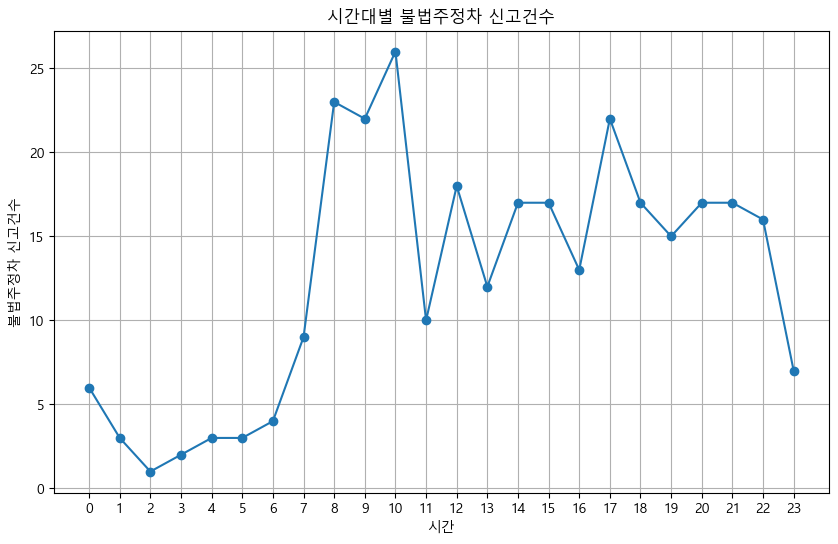

In [5]:
# 시각화

import pandas as pd
import matplotlib.pyplot as plt

# 불법주정차 신고현황 데이터 불러오기
parking_data = pd.read_csv('C:/Users/Administrator/Desktop/dayeong/불법주정차_신고현황_동대문구_filtered.csv')

# '민원접수시간' 컬럼에서 시간 데이터 추출
parking_data['시간'] = pd.to_datetime(parking_data['민원접수시간']).dt.hour

# 시간대별 신고건수 계산
hourly_parking_counts = parking_data.groupby('시간').size().reset_index(name='단위시간당_불법주정차_신고건수')

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(hourly_parking_counts['시간'], hourly_parking_counts['단위시간당_불법주정차_신고건수'], marker='o', linestyle='-')
plt.title('시간대별 불법주정차 신고건수')
plt.xlabel('시간')
plt.ylabel('불법주정차 신고건수')
plt.xticks(range(24))  # x축 레이블을 시간 단위로 설정
plt.grid(True)
plt.show()

### https://www.notion.so/PROJECT-3e28a2162b824c25b5163889b20f82e9?showMoveTo=true&saveParent=true